### Exercise 1

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
import time
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()


In [ ]:
n_images = len(imgs)
n_images

400

In [ ]:
X.shape

(4096, 400)

Visualize 10 randomly selected pictures with the corresponding labels.

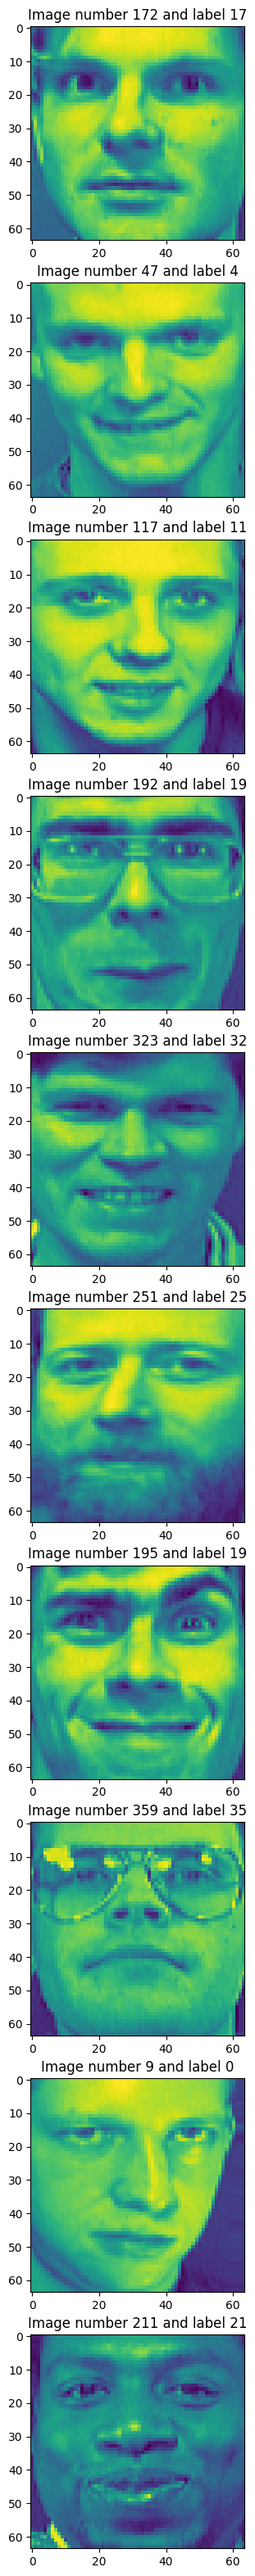

In [ ]:
np.random.seed(0)
N = 10
random_indices = np.random.choice(n_images, N)
fig, axes = plt.subplots(nrows=N, ncols=1, figsize = (30,40))
i = 0
for index in random_indices:
  axes[i].imshow(imgs[index])
  axes[i].set_title("Image number %d and label %d" %(index, labels[index]))
  i += 1


Compute and visualize the average of the images.

Text(0.5, 1.0, 'Average of the images')

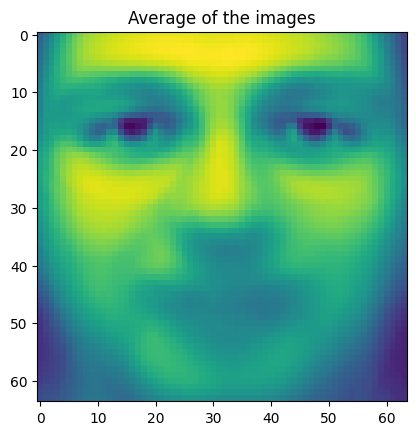

In [ ]:
average = np.mean(X, axis=1).reshape((64, 64))
plt.imshow(average)
plt.title("Average of the images")

Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False.



In [ ]:
# Reduced SVD
t0 = time.time()
U, s, VT = np.linalg.svd(X, full_matrices = False)
t1 = time.time()
print("Time for computing reduced SVD : %1.4f" %(t1-t0))

# Full SVD
t0 = time.time()
Uf, sf, VTf = np.linalg.svd(X)
t1 = time.time()
print("Time for computing full SVD : %1.4f" %(t1-t0))

Time for computing reduced SVD : 0.7468
Time for computing full SVD : 8.3470


Plot the trend of the singular values and the fraction of "explained variance".

Text(0.5, 1.0, 'Explained variance')

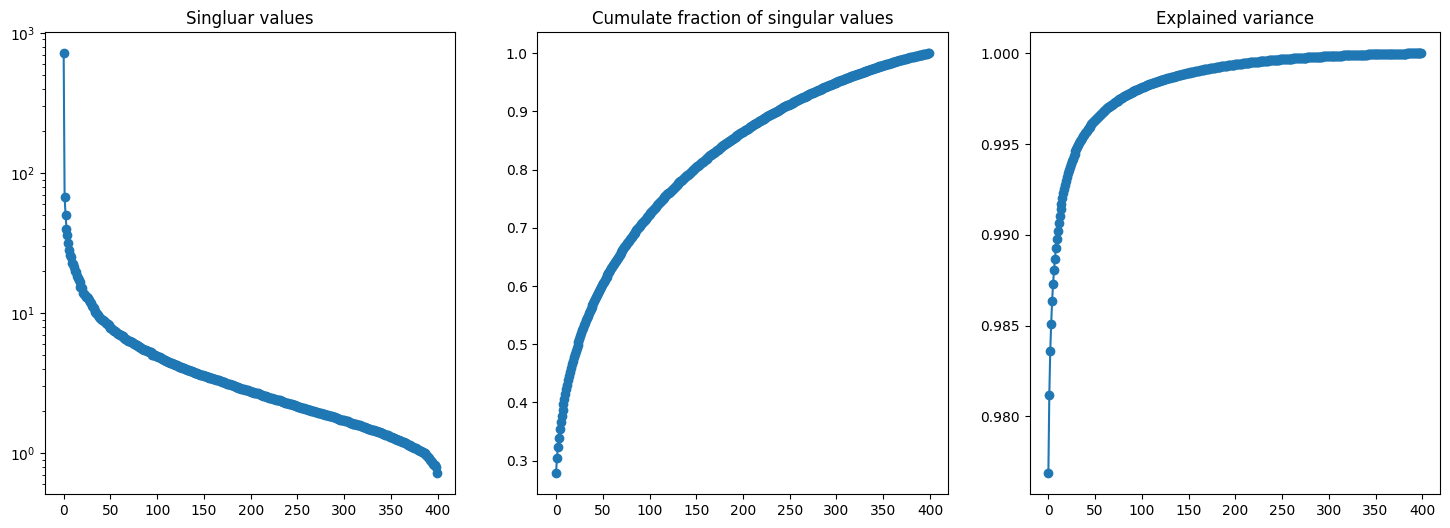

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

Implement a function computing the randomized SVD of rank k for a generic matrix.




In [ ]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k)
  Z = X @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ X
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones.

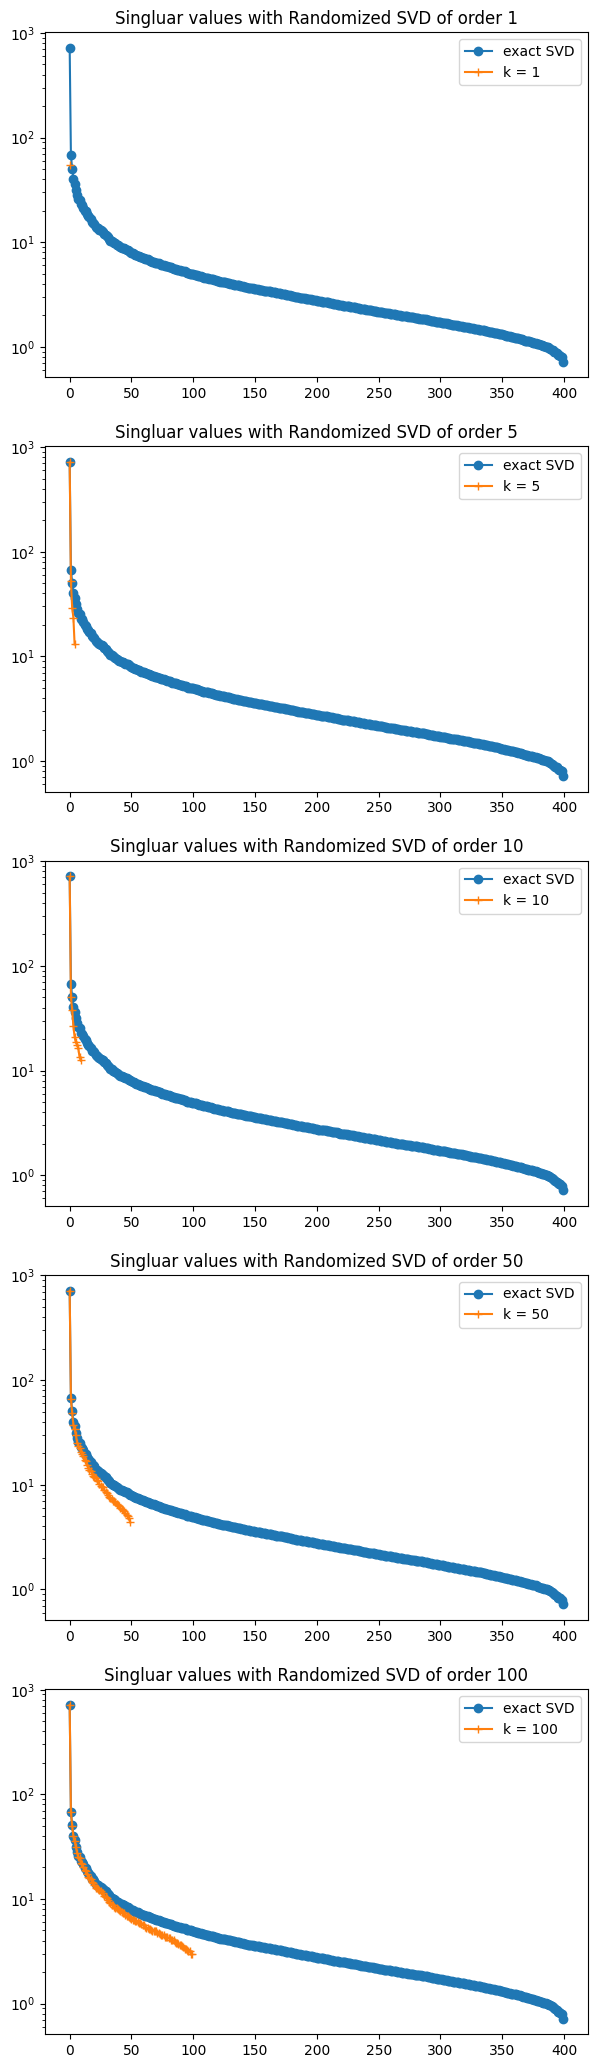

In [ ]:
K = [1, 5, 10, 50, 100]
fig, axes = plt.subplots(nrows=len(K), ncols=1, figsize = (7,26))
for i in range(len(K)):
  U_k, s_k, VT_k = randomized_SVD(X, K[i])
  axes[i].semilogy(s  , 'o-', label = "exact SVD")
  axes[i].semilogy(s_k, '+-', label = "k = %d" % K[i])
  axes[i].set_title('Singluar values with Randomized SVD of order %d' %K[i])
  axes[i].legend()

Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by
means of exact SVD. Compute the reconstruction error and plot it as a function of k.

Text(0, 0.5, 'Error')

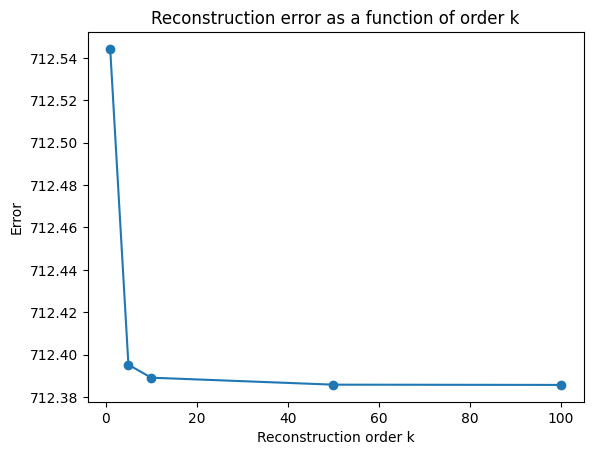

In [ ]:
errors_SVD = list()
X_bar = (X - np.mean(X, axis = 1)[:,None])
U, s, VT = np.linalg.svd(X_bar, full_matrices = False)
for k in K:
  X_reconstructed = U[:,:k]@np.diag(s[:k])@VT[:k,:]
  error = np.linalg.norm(X - X_reconstructed, ord = 2)
  errors_SVD.append(error)
plt.plot(K, errors_SVD, 'o-')
plt.title("Reconstruction error as a function of order k")
plt.xlabel("Reconstruction order k")
plt.ylabel("Error")

Visualize the first 30 principal axes.

In [ ]:
U[:,0:30] # first 30 principal axes -> first 30 eigenvector as the first 30 columns of matrix U

array([[ 0.0041911 ,  0.02859139,  0.00135691, ..., -0.00518842,
         0.01823633,  0.04346713],
       [ 0.0071095 ,  0.03328836, -0.0003258 , ..., -0.00760914,
         0.01636629,  0.03869198],
       [ 0.00933609,  0.0378465 , -0.00019799, ..., -0.01322112,
         0.0195126 ,  0.03464481],
       ...,
       [-0.00018516, -0.02962783, -0.01541365, ...,  0.01968058,
        -0.005037  , -0.00798183],
       [-0.00337966, -0.02721299, -0.01370978, ...,  0.03009903,
         0.00411575, -0.01658738],
       [-0.00318826, -0.02488899, -0.01188341, ...,  0.02830531,
         0.00832471, -0.02563833]], dtype=float32)

Compute the first two principal components related to the subset of images corresponding to labels = 0,
39.




In [ ]:
PHI = U.T @ X
PC1 = PHI[0,:] # First Principal Component is the first row of matrix PHI
PC2 = PHI[1,:] # Second Principal Component is the second row of matrix PHI
PC1_0 = PC1[labels == 0]
PC2_0 = PC2[labels == 0]
PC1_39 = PC1[labels == 39]
PC2_39 = PC2[labels == 39]



Create a scatterplot for the first 2 principal components of the subset of images grouped by label.


Text(0, 0.5, 'Second Principal Component')

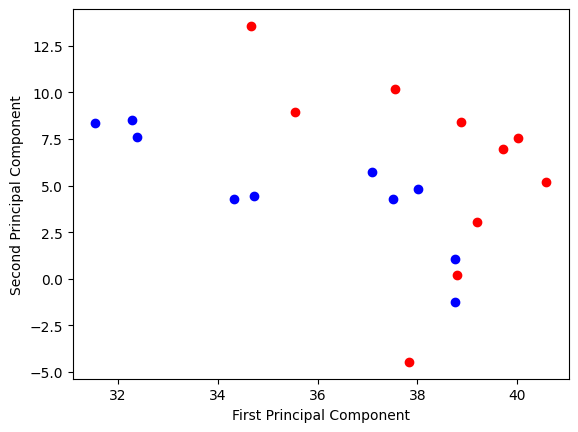

In [ ]:
plt.plot(PHI[0, labels == 0], PHI[1, labels == 0], "o", label="0", color="red")
plt.plot(PHI[0, labels == 39], PHI[1, labels == 39], "o", label="39", color="blue")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

### EXERCISE 2

In [ ]:
import numpy as np
import scipy

Write the loss function for the Ridge regression.

In [ ]:
def Loss(X, y, param,weights):
  return np.linalg.norm(y-X@weights)**2 + param*np.linalg.norm(weights)**2

Derive the expression of the solution **w**
(weight vector) for the Ridge regression.

In [ ]:
def analytical_solution(X, alpha, y):
  I = np.eye(X.shape[1])
  A = X.T@X + alpha*I
  b = X.T@y
  return scipy.linalg.solve(A, b)

Consider the dataset and the following values of λ (regularization parameter) λ = 0, 10−32
, 10−16
, 10−8
, 10−2
, 1, 16, 32, 1024.
Compute the values of **w** and plot the solution of the Ridge regression for the above mentioned values
of λ. Comment the obtained results.

Regularization parameter = 0
Obtained weights: [-1.91417704  0.30735787]
Correspondent Loss: 11.715644
Regularization parameter = 1e-32
Obtained weights: [-1.91417704  0.30735787]
Correspondent Loss: 11.715644
Regularization parameter = 1e-16
Obtained weights: [-1.91417704  0.30735787]
Correspondent Loss: 11.715644
Regularization parameter = 1e-18
Obtained weights: [-1.91417704  0.30735787]
Correspondent Loss: 11.715644
Regularization parameter = 1e-2
Obtained weights: [-1.91020967  0.30677082]
Correspondent Loss: 11.753152
Regularization parameter = 1
Obtained weights: [-1.58488515  0.25863073]
Correspondent Loss: 14.828887
Regularization parameter = 16
Obtained weights: [-0.4407356   0.08922307]
Correspondent Loss: 25.652754
Regularization parameter = 32
Obtained weights: [-0.24774366  0.06053059]
Correspondent Loss: 27.486197
Regularization parameter = 1024
Obtained weights: [-0.00644976  0.01850643]
Correspondent Loss: 30.182545


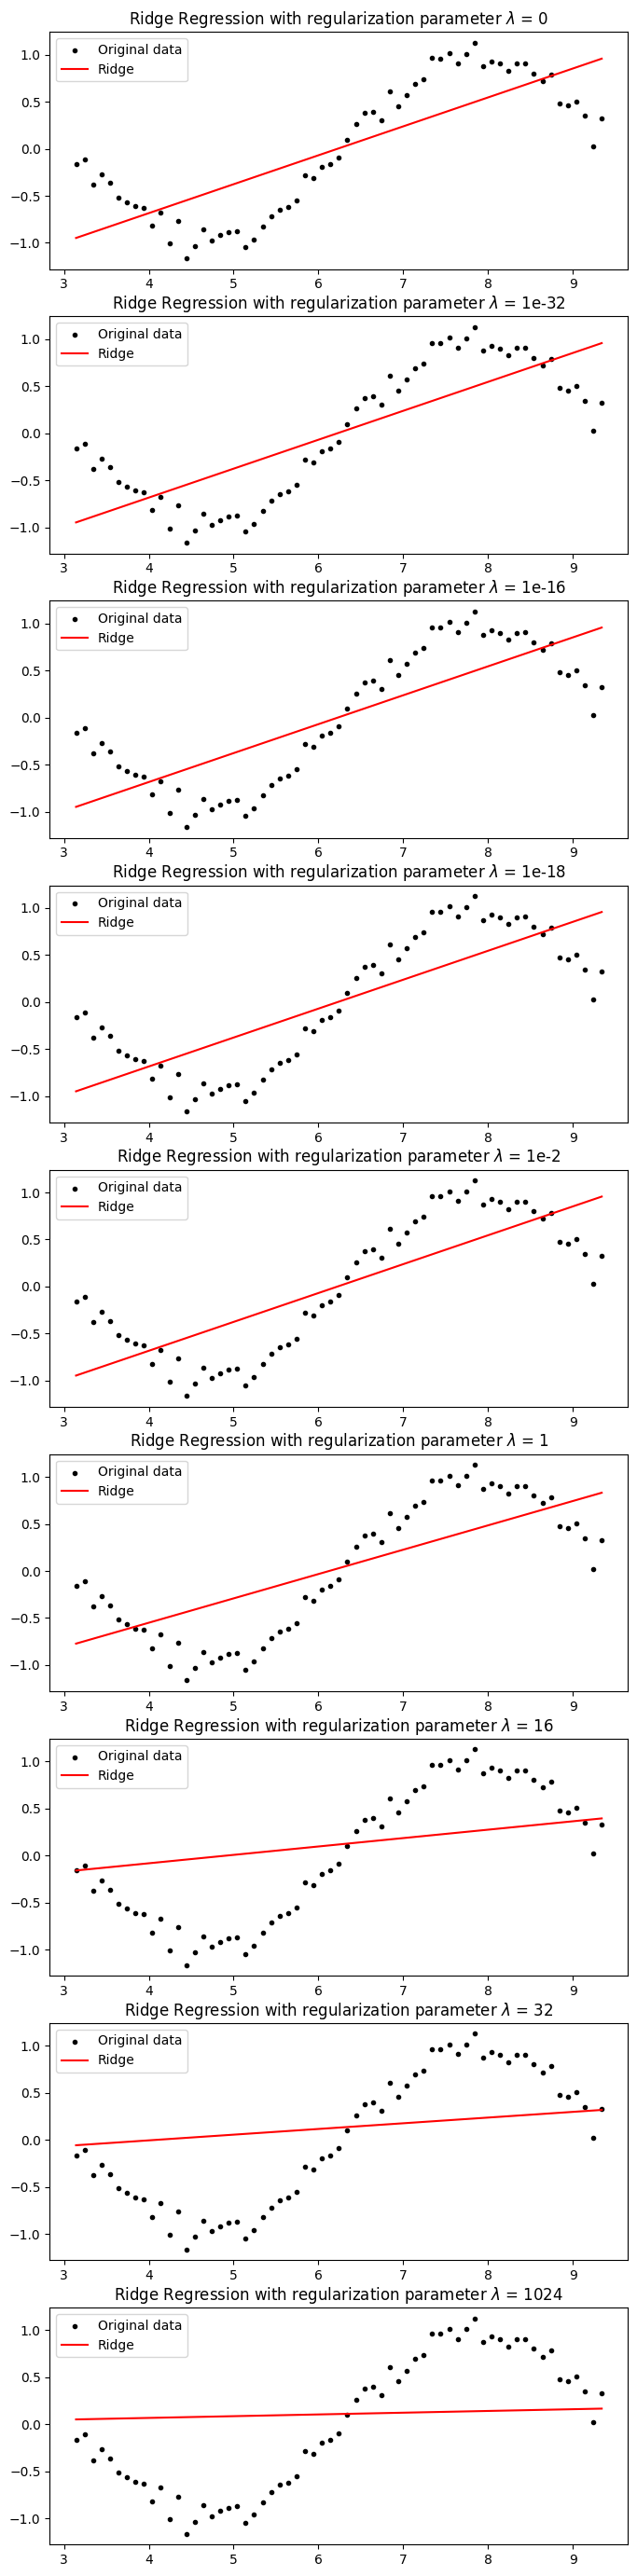

In [ ]:
np.random.seed(55)
x = np.arange(np.pi,3*np.pi,0.1)
y = np.sin(x) + np.random.normal(0,0.1,len(x))
lambdas = [0, 1e-32, 1e-16, 1e-18, 1e-2, 1, 16, 32, 1024]
params = ["0", "1e-32", "1e-16", "1e-18", "1e-2", "1", "16", "32", "1024"]
fig, axes = plt.subplots(nrows=len(lambdas), ncols=1, figsize = (8,35))
i = 0
X = np.column_stack((np.ones_like(x), x))
all_weights = list()
for param in lambdas:
  weights = analytical_solution(X, param, y)
  axes[i].scatter(x, y, color='black', marker='.', label='Original data')
  axes[i].plot(x, X@weights, color = 'red', label = 'Ridge')
  axes[i].legend()
  axes[i].set_title("Ridge Regression with regularization parameter $\lambda$ = %s" %params[i])
  print("Regularization parameter = %s" %params[i])
  print("Obtained weights: %s" %weights)
  print("Correspondent Loss: %f" %Loss(X, y, param,weights))
  all_weights.append(weights)
  i += 1